# opencv course
# A presentation by Mohammad Kahkeshani
### instagram:
#### codevision_academy
#### kahkeshani_mohammad

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Difference of Gaussian

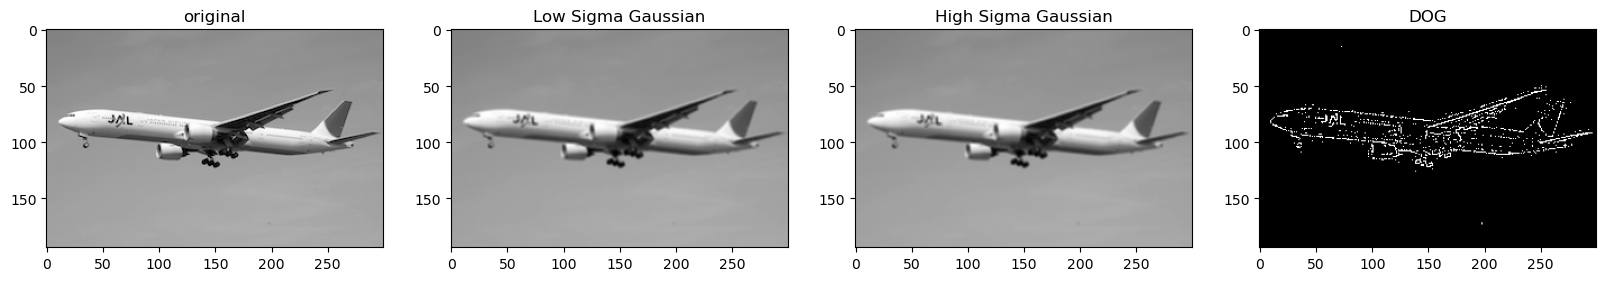

In [4]:
img = cv2.imread('images/airplane.jpg', 0)

# Apply Gaussian blur with different Sigma
low_sigma = cv2.GaussianBlur(img,(3,3),2)
high_sigma = cv2.GaussianBlur(img,(3,3),6)

# Calculate the DoG by subtracting
dog = low_sigma - high_sigma


plt.figure(figsize=[20,5])
plt.subplot(141),plt.imshow(img, cmap='gray'),plt.title('original');
plt.subplot(142),plt.imshow(low_sigma, cmap='gray'),plt.title('Low Sigma Gaussian');
plt.subplot(143),plt.imshow(high_sigma, cmap='gray'),plt.title('High Sigma Gaussian');
plt.subplot(144),plt.imshow(dog, cmap='gray'),plt.title('DOG');

### SIFT

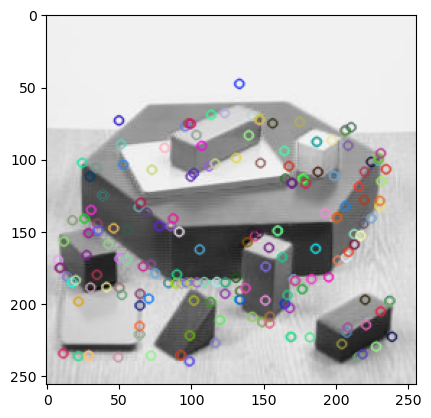

In [5]:
img = cv2.imread('images/blox.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# Initiate SIFT detector
sift = cv2.SIFT_create()
kp = sift.detect(gray,None)
img=cv2.drawKeypoints(img,kp,img)
plt.imshow(img),plt.show();

### size and direction

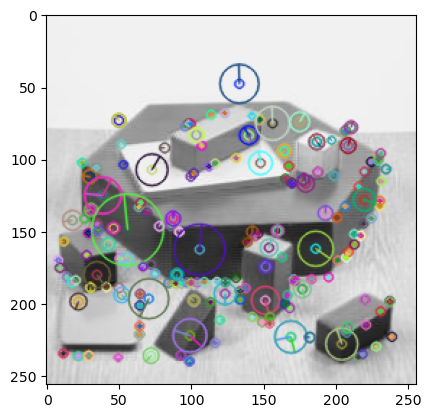

In [6]:
r = cv2.drawKeypoints(img, kp, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(r)

### new images

(<Axes: title={'center': 'Image2'}>,
 Text(0.5, 1.0, 'Image2'))

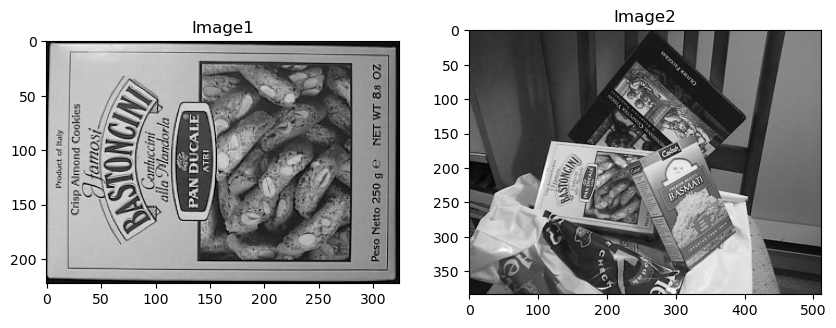

In [7]:
img1 = cv2.imread('images/box.png')
img2 = cv2.imread('images/box_in_scene.png') 

plt.figure(figsize=[10,5])
plt.subplot(121),plt.imshow(img1[...,::-1]),plt.title('Image1');
plt.subplot(122),plt.imshow(img2[...,::-1]),plt.title('Image2')

### check keypoints

In [9]:
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with ORB
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
print(des1.shape)
print(des2.shape)

(604, 128)
(969, 128)


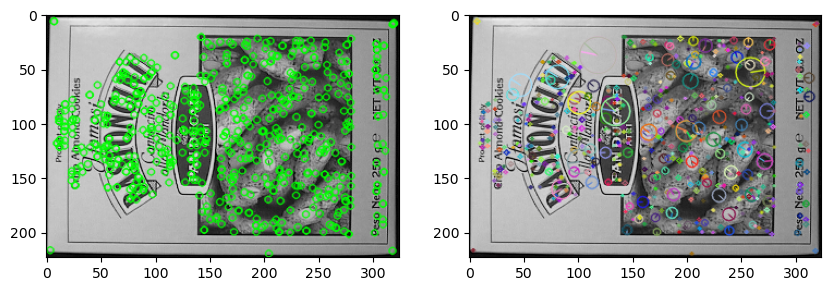

In [10]:
keypoints_without_size = np.copy(img1)
keypoints_with_size = np.copy(img1)

cv2.drawKeypoints(img1, kp1, keypoints_without_size, color = (0, 255, 0))
cv2.drawKeypoints(img1, kp1, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


plt.figure(figsize=[10,5])
plt.subplot(121),plt.imshow(keypoints_without_size[...,::-1]);
plt.subplot(122),plt.imshow(keypoints_with_size[...,::-1]);

### Matching important points

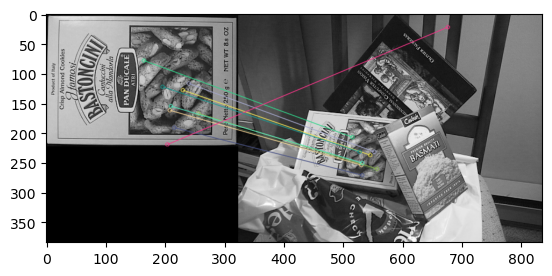


Number of Matching Keypoints Between The Training and Query Images:  604


In [11]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img3),plt.show();
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))